## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# get the total number of rows in the dataframe
n_rows = df.shape[0]
print('number of rows is :', n_rows)

number of rows is : 294478


c. The number of unique users in the dataset.

In [4]:
# get the number of unique values in the user_id column
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# the converted proportion
df.converted.sum()/n_rows

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df["is_equal_treatment"] = df['group'] == "treatment"
df["is_equal_new_page"] = df['landing_page'] == "new_page"
df['is_equal']= (df['is_equal_new_page']==df['is_equal_treatment'])
df['is_equal'].value_counts()

True     290585
False      3893
Name: is_equal, dtype: int64

f. Do any of the rows have missing values?

In [7]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 8 columns):
user_id               294478 non-null int64
timestamp             294478 non-null object
group                 294478 non-null object
landing_page          294478 non-null object
converted             294478 non-null int64
is_equal_treatment    294478 non-null bool
is_equal_new_page     294478 non-null bool
is_equal              294478 non-null bool
dtypes: bool(3), int64(2), object(3)
memory usage: 12.1+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
ind = df[ df['is_equal'] == False ].index
df2 = df.drop(ind , inplace=False)
df2.head()

,user_id,timestamp,group,landing_page,converted,is_equal_treatment,is_equal_new_page,is_equal
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,False,True
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,False,True
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,True,True,True
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,True,True,True
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,False,True


In [9]:
# check the results to make sure there is no (False) value
df2.is_equal.value_counts()

True    290585
Name: is_equal, dtype: int64

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# check the number of unique values in the user_id column
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# spot the dublicated row
duplicated_row = df2[df2.duplicated('user_id')]

c. What is the row information for the repeat **user_id**? 

In [13]:
# print the dublicated entry
print(duplicated_row)

      user_id                   timestamp      group landing_page  converted  \
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0   

      is_equal_treatment  is_equal_new_page  is_equal  
2893                True               True      True  


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# drop the duplicated entry 
df2.drop_duplicates(subset='user_id',inplace = True) 

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# probability of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#define a dataframe where all the data belong to having a control group
df_control = df2[df2['group']== "control"]

In [17]:
#probability of an individual in the control group to convert
df_control.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#define a dataframe where all the data belong to having a treatment group
df_tr = df2[df2['group']== "treatment"]
df_tr.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df_np = df2[df2['landing_page']== "new_page"]
df_np.shape[0]/df2.shape[0]

0.5000619442226688

In [20]:
df_np.head()

,user_id,timestamp,group,landing_page,converted,is_equal_treatment,is_equal_new_page,is_equal
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,True,True,True
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,True,True,True
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,True,True,True
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,True,True,True
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,True,True,True


In [21]:
#Drop the unwated columns from the dataframe
df2.drop(['is_equal_treatment', 'is_equal_new_page', 'is_equal'], axis =1, inplace = True)

In [22]:
#check that the unwanted columns are dropped
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**ANSWER: I do not think there is suffecient evidence that the new page stimulate more conversion as the conversion rate for the control and the treatment groups is similar at around 12%**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

# H0: P-old>= P-new

# H1: P-old<P-new

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
p_new = (df2.converted==1).mean()
print('the conversion rate for the new page is pnew =', p_new)

the conversion rate for the new page is pnew = 0.11959708724499628


In [24]:
## note: just summing the converted users
(df2.converted==1).sum()

34753

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
## note: all the control group recieved the old page
p_old = (df2.converted==1).mean()
print('the conversion rate for the old page is pold =', p_old)

the conversion rate for the old page is pold = 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df_np.shape[0]
print('the number of individuals in the treatment group is n_new = ', n_new)

the number of individuals in the treatment group is n_new =  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df_control.shape[0]
print('the number of individuals in the control group is n_old = ', n_old)

the number of individuals in the control group is n_old =  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
## (SKIP) time consuming

#new_page_converted = []
#size = df2.shape[0]
#for _ in range(10000):
#    samp_new = df2.sample(size, replace=True)
#    n_page_mean = samp_new.query('group == "treatment"').converted.mean()
#    new_page_converted.append(n_page_mean)

In [29]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
## (SKIP) time consuming

#old_page_converted = []
#size = df2.shape[0]
#for _ in range(10000):
#    samp_old = df2.sample(size, replace=True)
#    o_page_mean = samp_old.query('group == "control"').converted.mean()
#    old_page_converted.append(o_page_mean)

In [31]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
# convert to arrays
new_page_converted = np.array(new_page_converted)
old_page_converted = np.array(old_page_converted)

In [33]:
# conversion rate for indivisuals who viewed the new page under the null hypothesis
p_new_sample = new_page_converted.mean()
p_new_sample

0.11825751840891886

In [34]:
# conversion rate for indivisuals who viewed the old page under the null hypothesis
p_old_sample = old_page_converted.mean()
p_old_sample

0.11936753995897408

In [35]:
print('difference between the Pnew and the Pold from the samepling distributions is:', p_new_sample - p_old_sample)

difference between the Pnew and the Pold from the samepling distributions is: -0.0011100215500552124


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [36]:
# simulate sampling distribution for difference in proportions between the treatment and the control groups
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

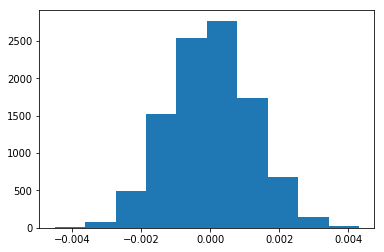

In [37]:
# Convert the difference in proportions results to numpy array
p_diffs = np.array(p_diffs)

# Plot the samoling distrinution of the difference in proportions 
plt.hist(p_diffs);

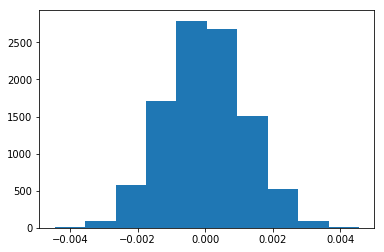

In [38]:
# To simulate from the null, create a ormal distruntion that is:
# 1-centrered at Zero
# 2-with the same standard deviation as the sampling distribution simulated
# 3-with the same size of the sampling distribution

null_vals = np.random.normal(0,p_diffs.std(), p_diffs.size)
plt.hist(null_vals);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [55]:
# get the diference in the conversion between the control group and the treatment group from the cleaned dataframes
obs_diff = df_tr.converted.mean() - df_control.converted.mean()  
print('observed diff in proportions of the actual data: ',obs_diff)
print('  ')

# convert the p_diffs to array
p_diffs = np.array(p_diffs)

# p_diffs_difference = (obs_diff < null_vals).mean()
# print('proportion of the p_diffs are greater than the actual difference observed in ab_data.csv : ',p_diffs_difference)

observed diff in proportions of the actual data:  -0.0015782389853555567
  


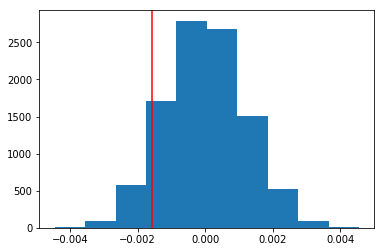

In [56]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'red');

In [57]:
# p_value calculation 
(null_vals>obs_diff).mean()
print('p_value :', (null_vals>obs_diff).mean() )

p_value : 0.9084


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**ANSWER: The difference in the converision rate between the new page and the old page in the treatement and hte control group does not apprear to be significant as the P-value is greater than the 5%. Which means, the null hypothesis cannot be rejected. In other words, there is not evidence that the new page is better than the old page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
convert_old = df_control.converted.sum()
convert_new = df_np.converted.sum()
n_old = df_control.group.count()
n_new = df_np.group.count()

In [59]:
#Import the statmodels to access stats.proportions_ztest fucntion
import statsmodels.api as sm

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [60]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print('z_score :', z_score)
print('p_value :', p_value)

z_score : -1.3109241984234394
p_value : 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z score is a test of statistical significance that helps in deciding whether or not to reject the null hypothesis. 
Z scores are measures of standard deviation (-1.31 standard deviations away from the mean). 
P-value ia a probability.
The results are similar to what we gor before and both suggest that the null hypothesis cannot be rejected**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logestic regression because it can predict outcomes of 0 and 1 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
# prepare for logestic regression modeling

# add the intercept column to the dataframe (df2)
df2['intercept'] = 1

# get dummy variables instead of the group column (1 for treatment and 0 for control)
df2[['control', 'ab_page']]=pd.get_dummies(df2.group)

df2.drop('control', axis=1, inplace=True)

#show the resulting dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [49]:
# import the statsmodels
import statsmodels.api as sm
# apply logestic regression model 
logit_mod = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
result = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:38:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


**ANSWER**

**_______________**

**the p_value is 0.190**

**H0 is p_new = P_old; (is a test for equal to)**

**H1 is P-new != p_old; (is a test for not equal to)**

**The results differe from the results of Part II because the tests are different. Here we test for equal and not equal. In Part II it was greater than or less than.**

**Also, the interpretation is different, here the "p-value" means that the "ab_page" parameter is not as statistically significant as the intercept in predicting the conversion.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

****We may not be able to capture the entire picture through one vairable. Several variables will allow us to see the picture more clrearly and spot trends that we are not able to see with the data we have**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [51]:
## load the dataframe with countries data
df_countries = pd.read_csv('./countries.csv')
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
# understand the number of countries and their names in the country column 
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
## create columns for the countries (dummy variables)
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3.country)

## check the resulting dataframe
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [62]:
## create columns to reflect the interaction between the country type and the ab_page
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']

In [67]:
## create a new logistic model taking into account the country 
## NOTE: the intercept column is already included in the dataframe
log_mod_country = sm.Logit(df3.converted, df3[['intercept', 'US_ab_page', 'UK_ab_page']])
result_country = log_mod_country.fit()
result_country.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Aug 2020   Pseudo R-squ.:               2.364e-05
Time:                        22:58:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
US_ab_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_ab_page     0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

# Conclusion

**We could not reject the null hypothesis for throughout the A/B testing process.
As a result, there is no evidence that the "new_page" helped in increasing the rate of converision.**

**I would suggest the following:**

**To continue with the "old_page" or allow more time to test the "new_page" while recorind more data related to users like their age or backgroup**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0